In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def fslope(slope, chi1, chi0, bound0):
    return bound0*np.exp(slope*(np.log(chi1)-np.log(chi0)))

def fexpslope(power, L1, L0, bound0):
    return bound0*np.exp(-(L1/L0)**power)

In [3]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)

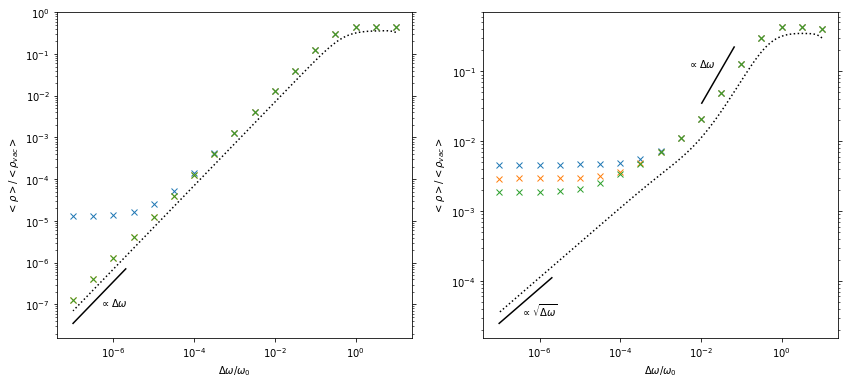

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

#plot inf-space first
inf_bounds_list = np.load("min_1DTM_4+0j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("min_1DTM_4+0j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax1.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)

#plot inverse designs
enh_files = ['DATA/TM1d_chi4+0j_L5_gpr1200_phc_LDOS_sca_enh.txt',
             'DATA/TM1d_chi4+0j_L10_gpr1200_phc_LDOS_sca_enh.txt',
            'DATA/TM1d_chi4+0j_L20_gpr1200_phc_LDOS_sca_enh.txt']
Qsrc_files = ['DATA/TM1d_chi4+0j_L5_gpr1200_phc_Qsrc.txt',
             'DATA/TM1d_chi4+0j_L10_gpr1200_phc_Qsrc.txt',
             'DATA/TM1d_chi4+0j_L20_gpr1200_phc_Qsrc.txt']

for i in range(len(enh_files)): 
    enh_list = np.loadtxt(enh_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(enh_list)]), 1-enh_list, 'x', zorder=2)

#add slopes
end_ind = len(inf_bounds_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.5*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

#################################################
#plot semi-analytic full-space bounds
inf_bounds_list = np.load("min_1DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("min_1DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)

#plot inverse designs
enh_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1500_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L10_gpr1500_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L20_gpr1500_LDOS_sca_enh.txt',
             'DATA/TM1d_chi4+1e-1j_L40_gpr1500_LDOS_sca_enh.txt',
            'DATA/TM1d_chi4+1e-1j_L80_gpr1500_LDOS_sca_enh.txt']
Qsrc_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1500_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L10_gpr1500_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L20_gpr1500_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L40_gpr1500_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L80_gpr1500_Qsrc.txt']

enh_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1200_phc_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L10_gpr1200_phc_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L20_gpr1200_phc_LDOS_sca_enh.txt']
Qsrc_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1200_phc_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L10_gpr1200_phc_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L20_gpr1200_phc_Qsrc.txt']

for i in range(len(enh_files)): 
    enh_list = np.loadtxt(enh_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(enh_list)]), 1-enh_list, 'x', zorder=2)

#plot slopes
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot slopes
shift = 65
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 3.8*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 3.8*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(-15,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

### label
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.set_ylim([1e-7, 1])
# ax2.set_ylim([1e-5, 1])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
plt.savefig('chi4and4+1e-1j_1DTM.pdf', bbox_inches='tight')

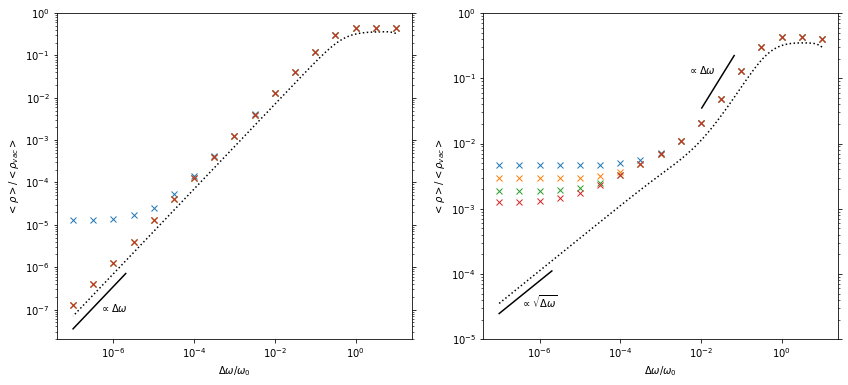

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))

#plot inf-space first
inf_bounds_list = np.load("min_1DTM_4+0j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("min_1DTM_4+0j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax1.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)

#plot inverse designs
enh_files = ['DATA/TM1d_chi4+0j_L5_gpr1200_vac_LDOS_sca_enh.txt',
             'DATA/TM1d_chi4+0j_L10_gpr1200_vac_LDOS_sca_enh.txt',
            'DATA/TM1d_chi4+0j_L20_gpr1200_vac_LDOS_sca_enh.txt',
            'DATA/TM1d_chi4+0j_L40_gpr1200_vac_LDOS_sca_enh.txt']
Qsrc_files = ['DATA/TM1d_chi4+0j_L5_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+0j_L10_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+0j_L20_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+0j_L40_gpr1200_vac_Qsrc.txt']

for i in range(len(enh_files)): 
    enh_list = np.loadtxt(enh_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax1.plot(np.reciprocal(2*Qsrc_list[0:len(enh_list)]), 1-enh_list, 'x', zorder=2)

#add slopes
end_ind = len(inf_bounds_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.5*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax1.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax1.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//3]), 0.5*(inf_bounds_list[end_ind-ind_width//3])), # these are the coordinates to position the label
                 xytext=(25,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal aslignment can be left, right or center

#################################################
#plot semi-analytic full-space bounds
inf_bounds_list = np.load("min_1DTM_4+1e-1j_dwQsrc_bounds.npy")
inf_Qsrc_list = np.load("min_1DTM_4+1e-1j_dwQsrc.npy")

#plot semi-analytic full-space bounds
ax2.plot(np.reciprocal(2*inf_Qsrc_list), inf_bounds_list, linestyle='dotted', label='$L/\lambda_{0} = \infty$', color='black', zorder=0)

#plot inverse designs
enh_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1200_vac_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L10_gpr1200_vac_LDOS_sca_enh.txt',
               'DATA/TM1d_chi4+1e-1j_L20_gpr1200_vac_LDOS_sca_enh.txt',
            'DATA/TM1d_chi4+1e-1j_L40_gpr1200_vac_LDOS_sca_enh.txt']
Qsrc_files = ['DATA/TM1d_chi4+1e-1j_L5_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L10_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L20_gpr1200_vac_Qsrc.txt',
             'DATA/TM1d_chi4+1e-1j_L40_gpr1200_vac_Qsrc.txt']

for i in range(len(enh_files)): 
    enh_list = np.loadtxt(enh_files[i])
    Qsrc_list = np.loadtxt(Qsrc_files[i])
    ax2.plot(np.reciprocal(2*Qsrc_list[0:len(enh_list)]), 1-enh_list, 'x', zorder=2)

#plot slopes
end_ind = len(inf_Qsrc_list)
start_ind = end_ind - 40
ind_width = abs(end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-.5, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 0.7*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \sqrt{\Delta\omega}$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 0.7*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(15,-15), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

#plot slopes
shift = 65
start_ind = 0 + shift
end_ind = start_ind + 25
ind_width = (end_ind - start_ind)
slopeQsrc = inf_Qsrc_list[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda Qsrc: fslope(-1.0, Qsrc, inf_Qsrc_list[end_ind-ind_width//2], 3.8*inf_bounds_list[end_ind-ind_width//2]), slopeQsrc)))
ax2.plot(np.reciprocal(2*slopeQsrc), slopeBounds, color='black')
ax2.annotate('$\propto \Delta\omega$', (1.0/(2*inf_Qsrc_list[end_ind-ind_width//2]), 3.8*(inf_bounds_list[end_ind-ind_width//2])), # these are the coordinates to position the label
                 xytext=(-15,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

### label
ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.set_ylim([1e-7, 1])
# ax2.set_ylim([1e-5, 1])
ax1.yaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
# ax1.title.set_text('$\chi = 4$')
# ax2.title.set_text('$\chi = 4 + 0.1i$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.set(xlabel='$\Delta\omega/\omega_{0}$')
ax1.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax2.set(xlabel='$\Delta\omega/\omega_{0}$')
ax2.set(ylabel='$<\\rho>/<\\rho_{vac}>$')
ax1.set_ylim([2*1e-8, 1])
ax2.set_ylim([1e-5, 1])
plt.savefig('chi4and4+1e-1j_1DTM.pdf', bbox_inches='tight')

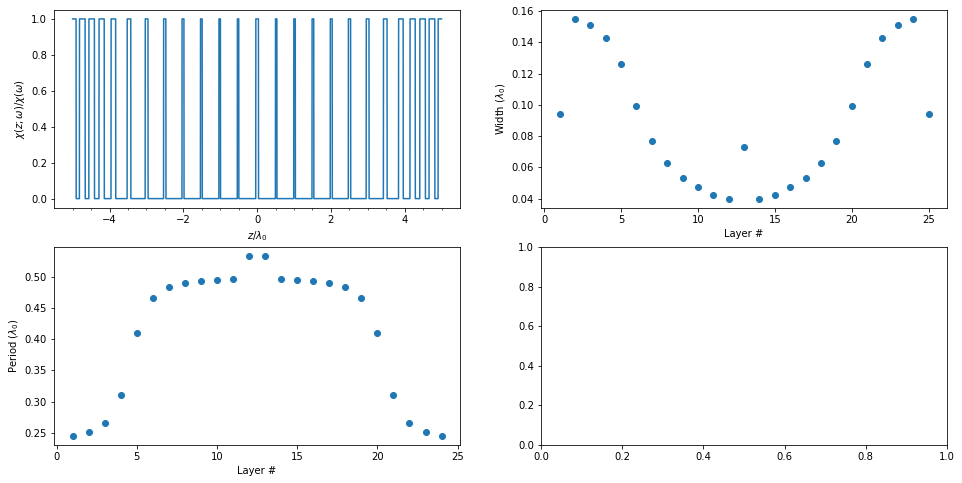

In [6]:
#plot rings
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8))
des_list = np.loadtxt('DATA/TM1d_chi4+1e-1j_L10_gpr1200_vac_Qsrc5.0e+06_optdof.txt')
desL = 10
gpr = 1200

ax1.plot(np.arange(0, len(des_list))/gpr - desL/2, des_list.round())
ax1.set_xlabel('$z/\lambda_{0}$')
ax1.set_ylabel('$\chi(z;\omega)/\chi(\omega)$')
ax1.xaxis.set_minor_locator(AutoMinorLocator())
#plot widths
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])
ax2.plot(np.linspace(1, len(gratings), num=len(gratings), endpoint=True), [len(gratings[i])/gpr for i in range(len(gratings))], 'o')
ax2.set_xlabel('Layer #')
ax2.set_ylabel('Width ($\lambda_{0}$)')
# ax3.axhline(y = (1+np.sqrt(1 + 4))/4/np.sqrt(1 + 4), color = 'black', linestyle = ':')
# ax2.set_yscale('log')
# ax2.set_xscale('log')
#plot spacing
def get_width(gratings, i):
    if i < len(gratings)//2:
        return (gratings[i+1][-1] - gratings[i][-1])/gpr
    return (gratings[i+1][0] - gratings[i][0])/gpr
ax3.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [get_width(gratings, i) for i in range(len(gratings)-1)], 'o')
ax3.set_xlabel('Layer #')
ax3.set_ylabel('Period ($\lambda_{0}$)')
# ax3.set_yscale('log')
# ax3.set_xscale('log')
#product of spacing and thickness
# ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [len(gratings[i])*get_width(gratings, i)/gpr for i in range(len(gratings)-1)], 'o')
# ax4.set_xlabel('Layer #')
# ax4.set_ylabel('Width * Period ($\lambda_{0}^{2}$)')
# ax4.set_yscale('log')
# ax4.set_xscale('log')
#try to fit squared func
# sqcoeff = len(gratings[0])*(gratings[0+1][0] - gratings[0][0])/gpr
# ax4.plot(np.linspace(1, len(gratings)-1, num=len(gratings)-1, endpoint=True), [sqcoeff*(i+1)**2 for i in range(len(gratings)-1)], 'o')

plt.savefig('minLDOS_TM_chi4+1e-1jQsrc5.0e+06_cyl_L40.pdf', bbox_inches='tight')

In [7]:
(1+np.sqrt(1 + 4))/4/np.sqrt(1 + 4)

0.36180339887498947

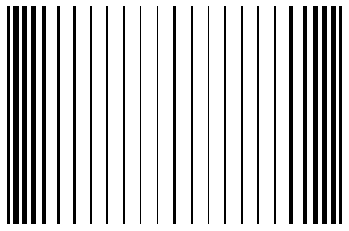

In [8]:
#phc section
import matplotlib.patches as mpatches

plt.figure()
ax = plt.axes()
for i in range(len(gratings)):
    art = mpatches.Rectangle((gratings[i][0], 0), len(gratings[i]), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.xlim([0, len(des_list)])
# plt.ylim([-0.5, 1.5])
plt.axis('off')
plt.savefig('TM1d_chi4+1e-1j_L10_gpr1200_vac_Qsrc5.0e+06_optdof_schematic.pdf', bbox_inches='tight')

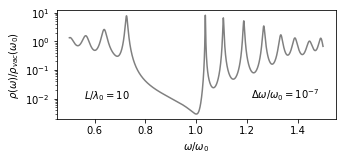

In [9]:
#Combined
###spectrum
filenames = ['DATA/TM1d_chi4+1e-1j_L10_gpr1200_vac_Qsrc5.0e+06_optdof_spectrum.npy']
ldos_list = np.load(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
# plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='gray')

#######
plt.annotate('$L/\lambda_{0} = 10$', (0.65, 1/10**2), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.35, 1/10**2), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
# plt.yscale('log')
plt.yticks([1e0,1e-4,1e-8])
plt.yscale('log')
plt.savefig('TM1d_chi4+1e-1j_L10_gpr1200_vac_Qsrc5.0e+06_optdof_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

<ipython-input-10-17ac534f9ff2>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0, 0.5, '$<\\rho>/<\\rho_{vac}>$')

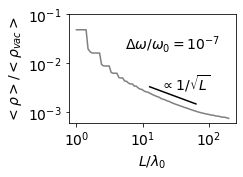

In [10]:
Rlist = np.loadtxt('DATA/TM1d_chi4+1e-1j_gpr1200_vac_Qsrc5.0e+06_Lsweep1to200_logspaced_80pts_gpr1200_L.txt')
invdes_vals = np.loadtxt('DATA/TM1d_chi4+1e-1j_gpr1200_vac_Qsrc5.0e+06_Lsweep1to200_logspaced_80pts_gpr1200_LDOS_sca_enh.txt')
invdes_vals = 1-invdes_vals

plt.figure(figsize=(3,2))
plt.rc('font', size=14)
plt.plot(Rlist, invdes_vals, color='#7f7f7f')

#plot slope
start_ind = 38
ind_width = 25
end_ind = start_ind + ind_width
slopeRlist = Rlist[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda R: fslope(-0.5, R, Rlist[start_ind], 1.35*invdes_vals[start_ind]), slopeRlist)))
plt.plot(slopeRlist, slopeBounds, color='black')
plt.annotate('$\propto 1/\sqrt{L}$', (Rlist[end_ind - ind_width//2], 1.25*invdes_vals[end_ind - ind_width//2]), # these are the coordinates to position the label
                 xytext=(10,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (Rlist[start_ind + ind_width//2], 0.02), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


plt.xscale('log')
plt.yscale('log')
# plt.title('$\chi = 4 + 0.1i, ~ \Delta\omega/\omega_{0} = \\frac{1}{2\cdot 10^6}$')
ax = plt.axes()
plt.xticks([1,10,100])
plt.yticks([1e-1,1e-2,1e-3])
plt.xlabel('$L/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
# plt.savefig('TM1d_chi4+1e-1j_gpr1200_vac_Qsrc5.0e+06_Lsweep1to200_logspaced_80pts_gpr1200.pdf', bbox_inches='tight')

In [11]:
Rlist[-1]

200.00000000000003

<ipython-input-12-feb034ff7bcf>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


Text(0, 0.5, '$<\\rho>/<\\rho_{vac}>$')

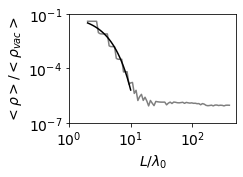

In [12]:
Rlist = np.loadtxt('DATA/TM1d_chi4+0j_gpr1200_vac_Qsrc5.0e+06_Lsweep1to200_logspaced_80pts_gpr1200_L.txt')
invdes_vals = np.loadtxt('DATA/TM1d_chi4+0j_gpr1200_vac_Qsrc5.0e+06_Lsweep1to200_logspaced_80pts_gpr1200_LDOS_sca_enh.txt')
invdes_vals = 1-invdes_vals

plt.figure(figsize=(3,2))
plt.rc('font', size=14)
plt.plot(2*Rlist, invdes_vals, color='#7f7f7f')

#plot slope
start_ind = 0
ind_width = 25
end_ind = start_ind + ind_width
slopeRlist = Rlist[start_ind:end_ind]
# slopeBounds = np.array(list(map(lambda R: fslope(-9, R, Rlist[start_ind], 1.35*invdes_vals[start_ind]), slopeRlist)))
slopeBounds = np.array(list(map(lambda R: fexpslope(1.4, R, Rlist[start_ind], 2.2*invdes_vals[start_ind]), slopeRlist)))
plt.plot(2*slopeRlist, slopeBounds, color='black')
# plt.annotate('$\propto e^{-L/\\xi}$', (2*Rlist[end_ind - ind_width//8], invdes_vals[end_ind - ind_width//8]), # these are the coordinates to position the label
#                  xytext=(20,20), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center

# plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (2*Rlist[-28], 0.008), # these are the coordinates to position the label
#                  xytext=(0,0), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center


plt.xscale('log')
plt.yscale('log')
# plt.title('$\chi = 4 + 0.1i, ~ \Delta\omega/\omega_{0} = \\frac{1}{2\cdot 10^6}$')
ax = plt.axes()
plt.xticks([1,10,100])
plt.yticks([1e-1,1e-4,1e-7])
plt.xlabel('$L/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
# plt.savefig('minLDOS_TM_chi4+1e-1j_gpr1200_dwQsrc1e7_Rsweep_cylindrical.pdf', bbox_inches='tight')